In [3]:
import time
import random
import psutil
import os
import sortingx as six
import matplotlib.pyplot as plt

In [4]:

# time with no key, no reverse
data = [[random.randint(0, 10) for _ in range(1000)] for _ in range(10000)]
testing = [[data for _ in range(7)] for _ in range(2)]

In [5]:
times, key = [], lambda x: (x[2], x[3])
def test(func=None, k=0):
    ts = time.time()
    func(testing[0][k], key, True)
    te = time.time()
    gap = te - ts
    times.append(gap)

def test_python():
    ts = time.time()
    testing[0][6].sort(key=key, reverse=True)
    te = time.time()
    gap = te - ts
    times.append(gap)

print(test(six.bubble, 0), test(six.heap, 1), test(six.insert, 2), test(six.merge, 3), test(six.quick, 4), test(six.shell, 5), test_python())

print(times)


None None None None None None None
[67.49558138847351, 0.320293664932251, 0.43234682083129883, 0.15800857543945312, 1.21272611618042, 0.07055068016052246, 0.003704547882080078]


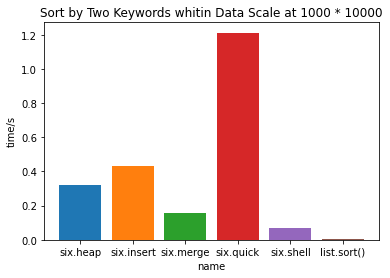

In [6]:
methdos = ['six.bubble', 'six.heap', 'six.insert', 'six.merge', 'six.quick', 'six.shell', 'list.sort()']
for i in range(1, 7):
    plt.bar(methdos[i], times[i])
 
plt.title("Sort by Two Keywords whitin Data Scale at 1000 * 10000")
plt.xlabel("name")
plt.ylabel("time/s")
 
plt.show()


In [12]:
def test(func=None, k=0):
    pid = os.getpid()
    p = psutil.Process(pid)
    info_start = p.memory_full_info().uss/1024
    func(testing[1][k], key=key, reverse=True)
    info_end=p.memory_full_info().uss/1024
    print(str(info_end-info_start))
test(six.shell, 4)

0.0


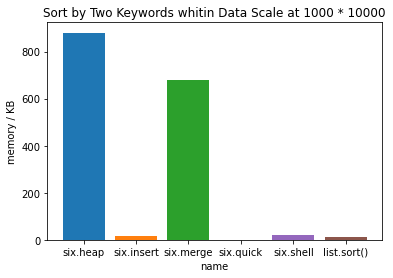

In [8]:
memeorys = [880, 16, 680, 16, 20, 12]
methdos = ['six.heap', 'six.insert', 'six.merge', 'six.quick', 'six.shell', 'list.sort()']
for i in range(6):
    plt.bar(methdos[i], memeorys[i])
 
plt.title("Sort by Two Keywords whitin Data Scale at 1000 * 10000")
plt.xlabel("name")
plt.ylabel("memory / KB")

plt.show()
